In [69]:
import os
print(os.getcwd())
#os.chdir("Metingen/CSV bestanden")
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

c:\Users\DELL\Documents\GitHub\EindprojThermAdPeMa\Metingen\CSV bestanden


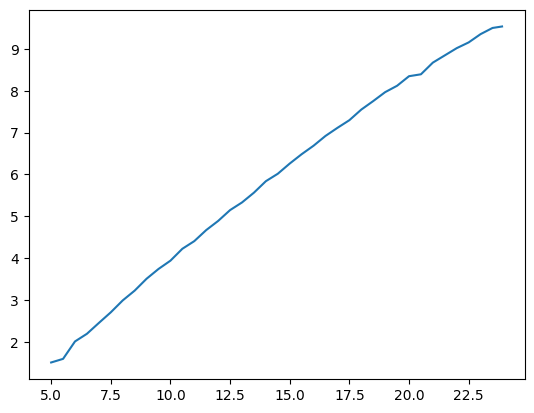

[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  22.  22.5 23.  23.5 23.9] [1.50368 1.59004 2.0066  2.18948 2.44856 2.70256 2.98704 3.22072 3.5052
 3.73888 3.937   4.22148 4.40436 4.66852 4.88696 5.14604 5.32892 5.5626
 5.83692 6.01472 6.25856 6.48208 6.68528 6.91896 7.112   7.29488 7.54888
 7.75208 7.96544 8.11784 8.34644 8.39216 8.67156 9.017   9.15416 9.35228
 9.4996  9.53516]


In [ ]:
import pandas as pd
import glob
import numpy as np

# Dictionary: voltage -> gekozen wind-snelheid
voltage_wind_value = {}

for file in glob.glob("v_wind *V.csv"):
    # Voltage uit bestandsnaam halen
    voltage = float(
        os.path.basename(file)
        .replace("v_wind ", "")
        .replace("V.csv", "")
    )

    # CSV inlezen
    df = pd.read_csv(file, usecols=[0,1,2], engine="python", on_bad_lines="skip")
    df.columns = ["Date/Time", "Temperature_F", "Wind_fpm"]

    # Numeriek maken (NaNs ontstaan hier)
    df["Wind_fpm"] = pd.to_numeric(df["Wind_fpm"], errors="coerce")

    # Zoek index van eerste NaN
    nan_idx = df["Wind_fpm"].isna().idxmax() if df["Wind_fpm"].isna().any() else len(df)

    # Pak het element twee voor de NaN
    if nan_idx >= 2:
        value = df["Wind_fpm"].iloc[nan_idx - 2]
        voltage_wind_value[voltage] = value
    else:
        voltage_wind_value[voltage] = None  # Te weinig waarden

Voltages = []
Speeds_fpm = []
for v, val in voltage_wind_value.items():
    Voltages += [v]
    Speeds_fpm += [val]

Voltages = np.sort(Voltages)
Speeds_fpm = np.sort(Speeds_fpm)

Speeds = Speeds_fpm*(0.3048 / 60)    #Omzetten naar m/s


plt.figure()
plt.plot(Voltages, Speeds)
plt.show()



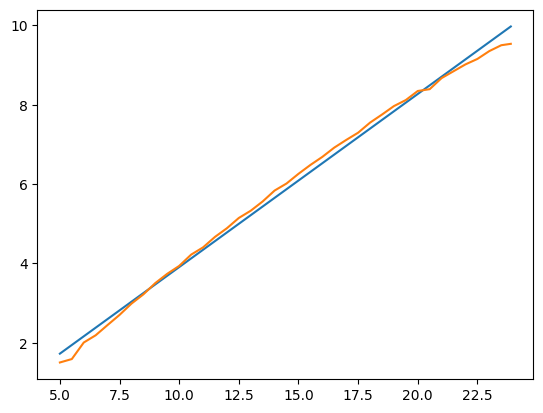

richtingscoefficient =  0.44 m/Vs
minimale snelheid =  1.73 m/s bij 5V
minimale spanning = 5V ten gevolge van drempelspanning van de ventilator


In [81]:
def VS_function(V, a, b):
    return a*V + b

val, cov = curve_fit(VS_function, Voltages, Speeds)

plt.figure()
plt.plot(Voltages, val[0]*Voltages + val[1])
plt.plot(Voltages, Speeds)
plt.show()



print('richtingscoefficient = ', f"{val[0]:.2f}", 'm/Vs')
print('minimale snelheid = ', f"{(val[0]*5 + val[1]):.2f}", 'm/s bij 5V')
print('minimale spanning = 5V ten gevolge van drempelspanning van de ventilator')